In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

beer_path = "output_data/craft_beer_nv.csv"
beer_df = pd.read_csv(beer_path)

census_path ="output_data/census_data_state.csv"
census_df = pd.read_csv(census_path)

beer_df.head()

,Name,id,Alcohol By Volume,International Bitterness Units,Standard Reference Method,Style,Category,Brewer,City,State,Latitude,Longitude,Region
0,Possession Porter,723,5.6,0,0,Porter,Irish Ale,Diamond Knot Brewery & Alehouse,Mukilteo,Washington,47.9485,-122.3050,West
1,Free Bike Amber,742,4.5,0,0,American-Style Amber/Red Ale,North American Ale,Skagit River Brewing,Mount Vernon,Washington,48.4192,-122.3350,West
2,Potrero ESB,3982,5.2,0,0,Special Bitter or Best Bitter,British Ale,21st Amendment Brewery Cafe,San Francisco,California,37.7825,-122.3930,West
3,Twisted Kilt Scotch Ale,4221,5.0,0,0,Scotch Ale,British Ale,Thirsty Dog Brewing,Akron,Ohio,41.0689,-81.5172,Midwest
4,HarvestÃ¶r Fresh Hop Ale,5243,7.2,0,0,American-Style Pale Ale,North American Ale,Lift Bridge Brewery,Stillwater,Minnesota,45.0565,-92.8222,Midwest


In [2]:
census_df.head()

,State,Name,Population,Median Age,Household Income,Per Capita Income,Region
0,27,Minnesota,5527358.0,37.9,68411.0,36245.0,Midwest
1,28,Mississippi,2988762.0,37.2,43567.0,23434.0,Southeast
2,29,Missouri,6090062.0,38.5,53560.0,29537.0,Midwest
3,30,Montana,1041732.0,39.8,52559.0,29765.0,West
4,31,Nebraska,1904760.0,36.4,59116.0,31101.0,Midwest


In [17]:
bps = beer_df.groupby(['State']).count()['Name']
pps = census_df[['Name','Per Capita Income']]
pps = pps.rename(columns = {"Name":"State"})
pps.index = pps["State"]
pps["Breweries"] = bps
pps["Breweries"] = pps["Breweries"].fillna(0)


corr_df = pd.DataFrame({"Breweries":bps,
                        "Population":""
})
pps.head()

,State,Per Capita Income,Breweries
State,,,
Minnesota,Minnesota,36245.0,28.0
Mississippi,Mississippi,23434.0,0.0
Missouri,Missouri,29537.0,43.0
Montana,Montana,29765.0,5.0
Nebraska,Nebraska,31101.0,27.0


The correlation between per capita income and number of breweries is 0.2


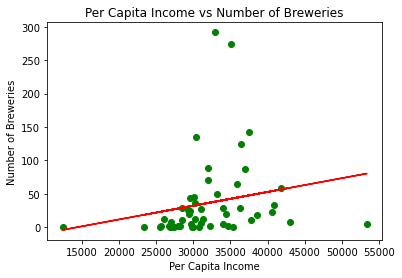

In [18]:
corr=round(st.pearsonr(pps['Per Capita Income'],pps['Breweries'])[0],2)
print(f"The correlation between per capita income and number of breweries is {corr}")
model = st.linregress(pps['Per Capita Income'],pps['Breweries'])

y_values = pps['Per Capita Income']*model[0]+model[1]
plt.scatter(pps['Per Capita Income'],pps['Breweries'],color="g")
plt.plot(pps['Per Capita Income'],y_values,color="red")
plt.xlabel('Per Capita Income')
plt.ylabel('Number of Breweries')
plt.title("Per Capita Income vs Number of Breweries")
plt.savefig("./Images/income_v_brew.png")
plt.show()